In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='Latin-1')

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
Base_Dados.shape

(1034, 9)

In [ ]:
Base_Dados.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


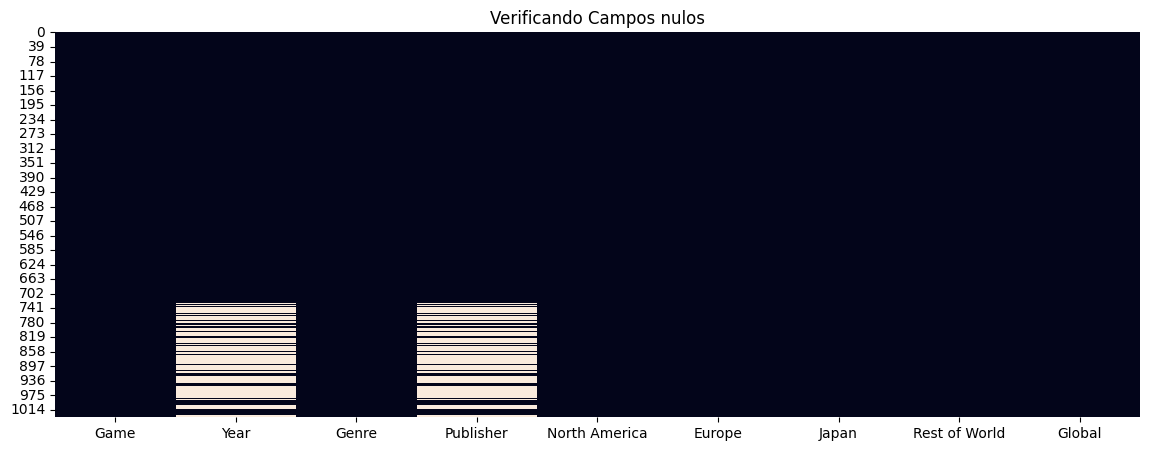

In [ ]:
plt.figure( figsize=(14, 5) )
plt.title('Verificando Campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [ ]:
Base_Dados.dropna( inplace=True )

In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


In [ ]:
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Text(0, 0.5, 'Quantidade Vendas (mi)')

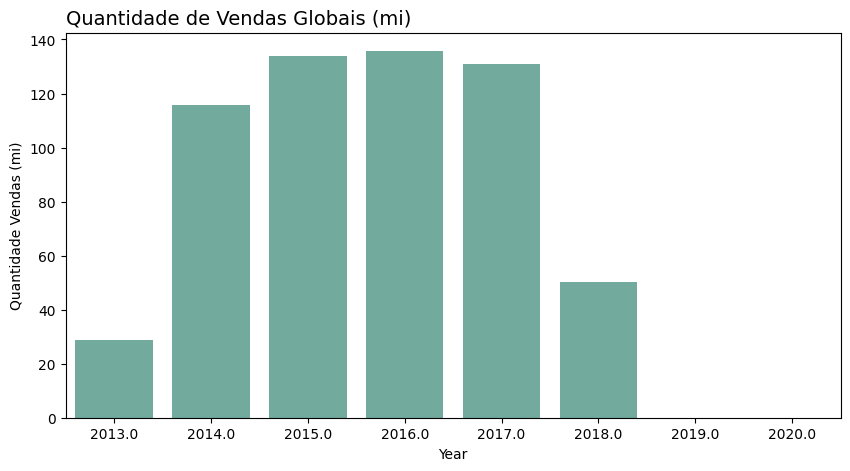

In [ ]:
plt.figure( figsize=(10, 5) )

plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize='14')

sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Quantidade Vendas (mi)')

In [ ]:
Base_Dados = Base_Dados.loc[ (Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020) ]

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


<Axes: title={'left': 'Distribição das vendas globais'}, xlabel='Global', ylabel='Density'>

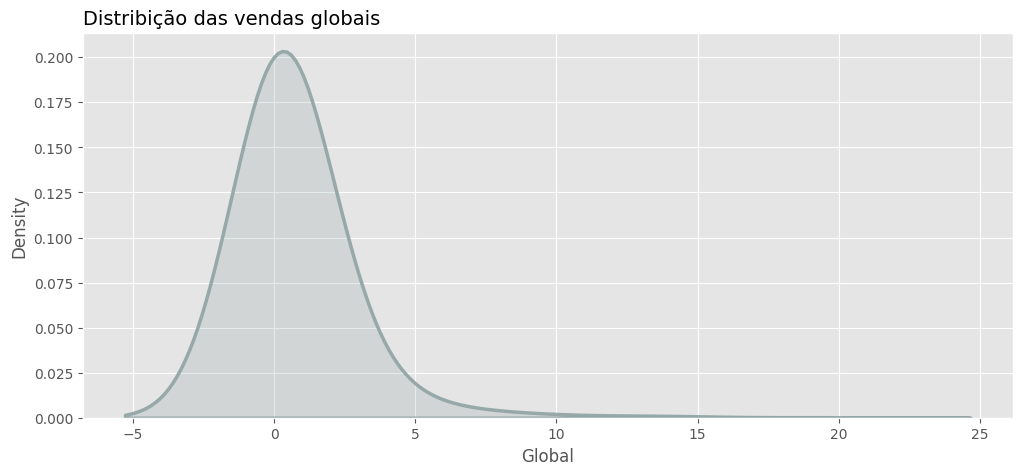

In [ ]:
plt.figure( figsize=(12, 5) )

plt.style.use('ggplot')


plt.title('Distribição das vendas globais', loc='left', fontsize=14)
sns.kdeplot( Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5)

In [ ]:
Base_Dados.groupby(by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


<Axes: title={'center': 'Análise da distribuição Global (Mi)'}, xlabel='Year', ylabel='Global'>

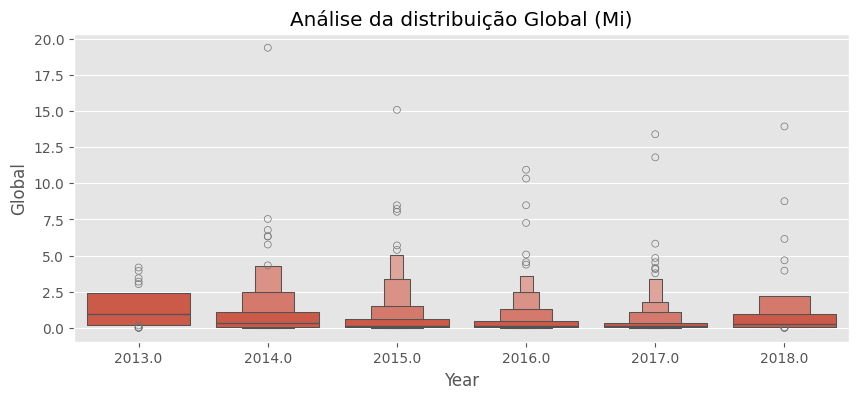

In [ ]:
plt.figure( figsize=(10, 4))

plt.title('Análise da distribuição Global (Mi)')

sns.boxenplot( data=Base_Dados, x='Year', y='Global' )

In [ ]:
Base_Dados.loc[ Base_Dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
Base_Dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
Analise = Base_Dados.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

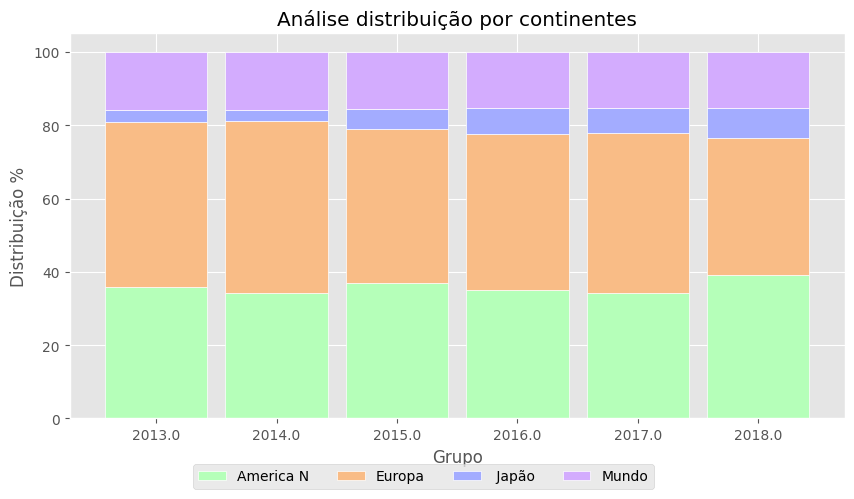

In [ ]:
plt.figure( figsize=(10, 5) )

Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

plt.xticks( Grupos, Rotulos )
plt.xlabel( 'Grupo' )
plt.ylabel('Distribuição %')

plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


In [ ]:
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform( Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_Label.fit_transform( Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_Label.fit_transform( Base_Dados['Game'])

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [ ]:
Paleta_Cores = sns.color_palette('husl', 8)

Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

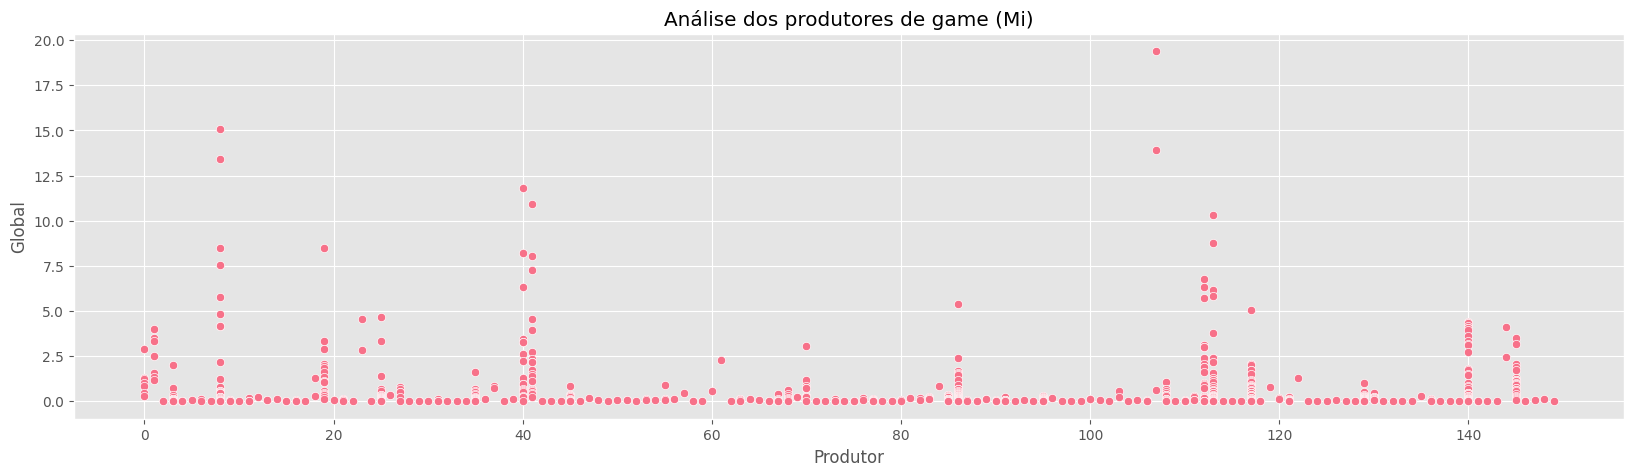

In [ ]:
plt.figure( figsize=(20, 5))
plt.title('Análise dos produtores de game (Mi)')
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color= Paleta_Cores[0]);

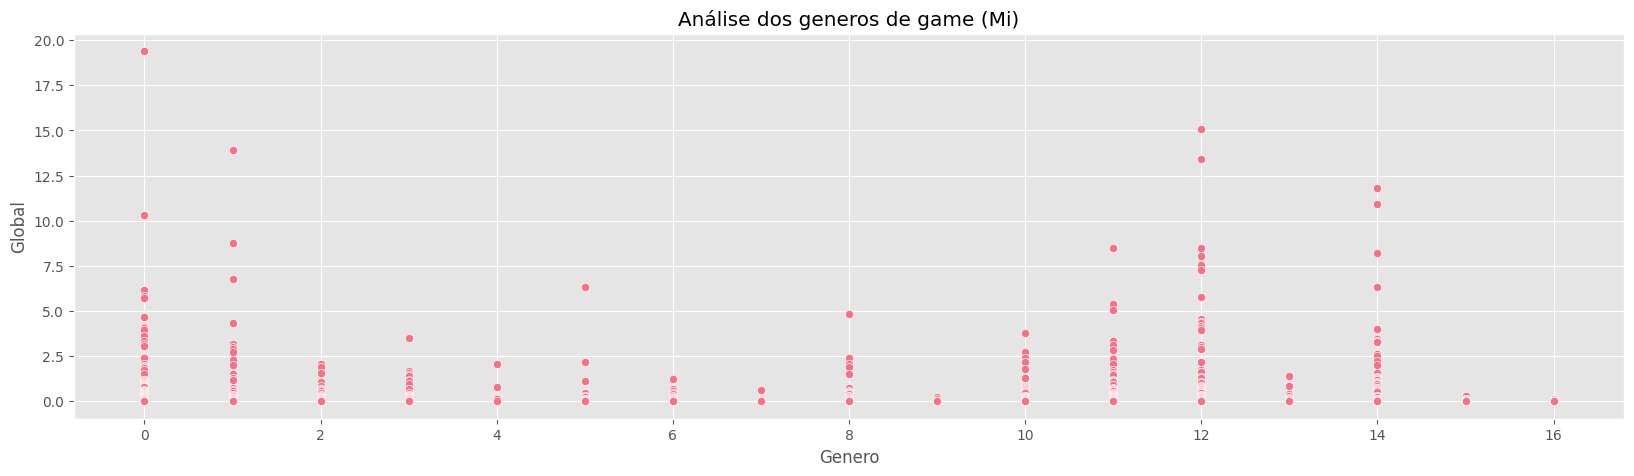

In [ ]:
plt.figure( figsize=(20, 5))
plt.title('Análise dos generos de game (Mi)')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color= Paleta_Cores[0]);

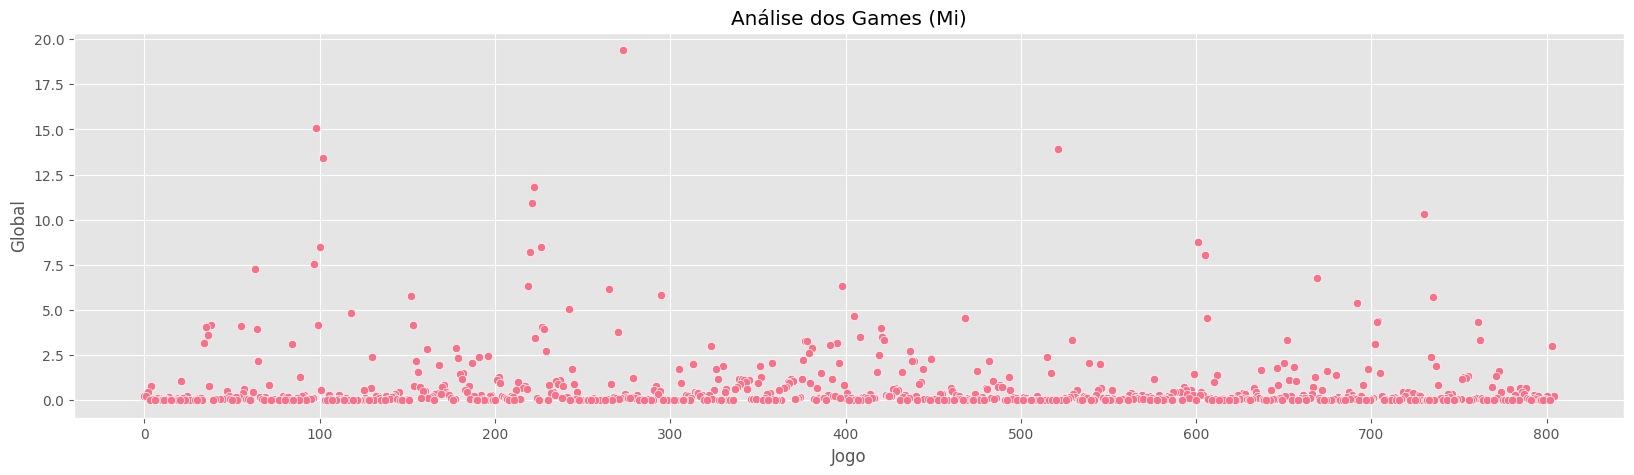

In [ ]:
plt.figure( figsize=(20, 5))
plt.title('Análise dos Games (Mi)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color= Paleta_Cores[0]);